# Análisis Exploratorio de Datos (EDA) 

Este notebook contiene el análisis exploratorio completo del dataset de películas para entender mejor los datos antes de crear visualizaciones y modelos de machine learning.

## Objetivos:
1. Cargar y explorar la estructura del dataset
2. Analizar la calidad de los datos (valores nulos, duplicados, etc.)
3. Realizar análisis estadísticos descriptivos
4. Identificar patrones y tendencias en los datos
5. Preparar los datos para visualizaciones y modelado

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configurar pandas para mostrar más columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Librerías importadas correctamente")

Librerías importadas correctamente


## 1. Carga y Exploración Inicial de los Datos

In [2]:
# Cargar el dataset
df = pd.read_csv('../data/movie.csv')

# Mostrar información básica del dataset
print("="*50)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*50)
print(f"Dimensiones del dataset: {df.shape}")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")
print("\nPrimeras 5 filas:")
df.head()

INFORMACIÓN GENERAL DEL DATASET
Dimensiones del dataset: (1000, 12)
Número de filas: 1000
Número de columnas: 12

Primeras 5 filas:


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
# Información sobre los tipos de datos y valores nulos
print("="*50)
print("INFORMACIÓN DE COLUMNAS")
print("="*50)
print(df.info())
print("\n" + "="*50)
print("VALORES NULOS POR COLUMNA")
print("="*50)
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100
null_info = pd.DataFrame({
    'Valores_Nulos': null_counts,
    'Porcentaje': null_percentages
})
print(null_info[null_info['Valores_Nulos'] > 0])

INFORMACIÓN DE COLUMNAS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None

VALORES NULOS POR COLUMNA
                    Valores_Nulos  Porcentaje
Revenue (Millions)            128        12

## 2. Análisis Estadístico Descriptivo

In [4]:
# Estadísticas descriptivas para variables numéricas
print("="*50)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("="*50)
numerical_cols = ['Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']
df[numerical_cols].describe()

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [5]:
# Análisis de géneros de películas
print("="*50)
print("ANÁLISIS DE GÉNEROS")
print("="*50)

# Separar los géneros (están separados por comas)
genres_expanded = df['Genre'].str.split(',').explode().str.strip()
genre_counts = genres_expanded.value_counts()
print("Géneros más comunes:")
print(genre_counts.head(10))

print(f"\nTotal de géneros únicos: {len(genre_counts)}")
print(f"Películas con múltiples géneros: {len(df[df['Genre'].str.contains(',', na=False)])}")

# Top directores
print("\n" + "="*50)
print("TOP 10 DIRECTORES CON MÁS PELÍCULAS")
print("="*50)
director_counts = df['Director'].value_counts()
print(director_counts.head(10))

ANÁLISIS DE GÉNEROS
Géneros más comunes:
Genre
Drama        513
Action       303
Comedy       279
Adventure    259
Thriller     195
Crime        150
Romance      141
Sci-Fi       120
Horror       119
Mystery      106
Name: count, dtype: int64

Total de géneros únicos: 20
Películas con múltiples géneros: 895

TOP 10 DIRECTORES CON MÁS PELÍCULAS
Director
Ridley Scott          8
David Yates           6
Paul W.S. Anderson    6
Michael Bay           6
M. Night Shyamalan    6
Christopher Nolan     5
Peter Berg            5
Justin Lin            5
J.J. Abrams           5
Danny Boyle           5
Name: count, dtype: int64


## 3. Análisis de Correlaciones y Patrones

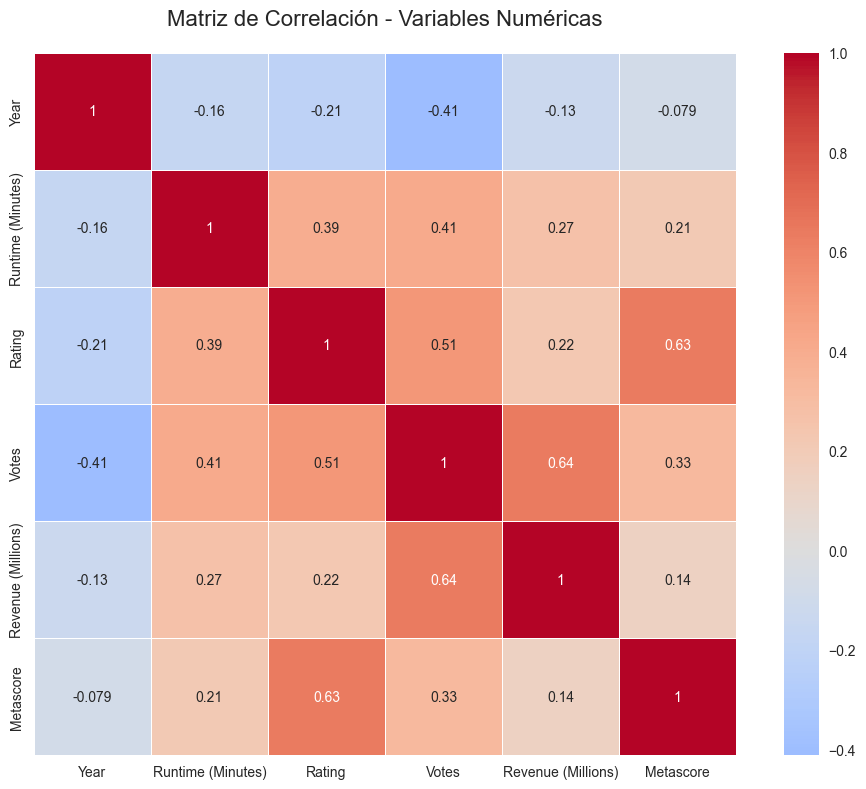

CORRELACIONES MÁS FUERTES
Top 10 correlaciones positivas:
Revenue (Millions)  Votes                 0.639661
Votes               Revenue (Millions)    0.639661
Metascore           Rating                0.631897
Rating              Metascore             0.631897
                    Votes                 0.511537
Votes               Rating                0.511537
Runtime (Minutes)   Votes                 0.407062
Votes               Runtime (Minutes)     0.407062
Rating              Runtime (Minutes)     0.392214
Runtime (Minutes)   Rating                0.392214
dtype: float64

Top 5 correlaciones negativas:
Runtime (Minutes)  Year     -0.164900
Rating             Year     -0.211219
Year               Rating   -0.211219
                   Votes    -0.411904
Votes              Year     -0.411904
dtype: float64


In [6]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Análisis de correlaciones más fuertes
print("="*50)
print("CORRELACIONES MÁS FUERTES")
print("="*50)
corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
# Filtrar las correlaciones perfectas (consigo mismo)
corr_pairs = corr_pairs[corr_pairs < 0.999]
print("Top 10 correlaciones positivas:")
print(corr_pairs.head(10))
print("\nTop 5 correlaciones negativas:")
print(corr_pairs.tail(5))

In [7]:
# Análisis temporal - Evolución por años
print("="*50)
print("ANÁLISIS TEMPORAL")
print("="*50)
yearly_stats = df.groupby('Year').agg({
    'Rating': ['count', 'mean'],
    'Revenue (Millions)': 'mean',
    'Votes': 'mean',
    'Metascore': 'mean'
}).round(2)

yearly_stats.columns = ['Número_Películas', 'Rating_Promedio', 'Revenue_Promedio', 
                       'Votes_Promedio', 'Metascore_Promedio']
print("Estadísticas por año:")
print(yearly_stats.tail(10))

# Películas con mejor y peor rating
print("\n" + "="*50)
print("PELÍCULAS CON MEJOR RATING")
print("="*50)
top_rated = df.nlargest(5, 'Rating')[['Title', 'Rating', 'Year', 'Genre', 'Director']]
print(top_rated)

print("\n" + "="*50)
print("PELÍCULAS CON PEOR RATING")
print("="*50)
worst_rated = df.nsmallest(5, 'Rating')[['Title', 'Rating', 'Year', 'Genre', 'Director']]
print(worst_rated)

ANÁLISIS TEMPORAL
Estadísticas por año:
      Número_Películas  Rating_Promedio  Revenue_Promedio  Votes_Promedio  \
Year                                                                        
2007                53             7.13             87.88       244331.04   
2008                52             6.78             99.08       275505.38   
2009                51             6.96            112.60       255780.65   
2010                60             6.83            105.08       252782.32   
2011                63             6.84             87.61       240790.30   
2012                64             6.92            107.97       285226.09   
2013                91             6.81             87.12       219049.65   
2014                98             6.84             85.08       203930.22   
2015               127             6.60             78.36       115726.22   
2016               297             6.44             54.69        48591.75   

      Metascore_Promedio  
Year    

## 4. Detección de Outliers y Análisis de Calidad de Datos

In [8]:
# Detección de outliers usando el método IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("="*50)
print("DETECCIÓN DE OUTLIERS")
print("="*50)

for col in ['Rating', 'Runtime (Minutes)', 'Votes', 'Revenue (Millions)']:
    if df[col].notna().sum() > 0:  # Solo si hay datos no nulos
        outliers, lower, upper = detect_outliers_iqr(df, col)
        print(f"\n{col}:")
        print(f"  Rango normal: [{lower:.2f}, {upper:.2f}]")
        print(f"  Número de outliers: {len(outliers)}")
        if len(outliers) > 0:
            print(f"  Ejemplos de outliers:")
            examples = outliers.nlargest(3, col)[['Title', col]] if col != 'Rating' else outliers.nsmallest(3, col)[['Title', col]]
            print(examples.to_string(index=False))

DETECCIÓN DE OUTLIERS

Rating:
  Rango normal: [4.40, 9.20]
  Número de outliers: 19
  Ejemplos de outliers:
                  Title  Rating
         Disaster Movie     1.9
Don't Fuck in the Woods     2.7
   Dragonball Evolution     2.7

Runtime (Minutes):
  Rango normal: [65.50, 157.50]
  Número de outliers: 30
  Ejemplos de outliers:
                  Title  Runtime (Minutes)
             Grindhouse                191
      The Hateful Eight                187
The Wolf of Wall Street                180

Votes:
  Rango normal: [-269092.12, 545310.88]
  Número de outliers: 45
  Ejemplos de outliers:
                Title   Votes
      The Dark Knight 1791916
            Inception 1583625
The Dark Knight Rises 1222645

Revenue (Millions):
  Rango normal: [-137.40, 264.38]
  Número de outliers: 55
  Ejemplos de outliers:
                                     Title  Revenue (Millions)
Star Wars: Episode VII - The Force Awakens              936.63
                                    Avatar 

In [9]:
# Análisis de duplicados
print("="*50)
print("ANÁLISIS DE DUPLICADOS")
print("="*50)
duplicates = df.duplicated()
print(f"Filas duplicadas: {duplicates.sum()}")

# Verificar duplicados por título
title_duplicates = df[df.duplicated(['Title'], keep=False)].sort_values('Title')
print(f"Películas con títulos duplicados: {len(title_duplicates)}")
if len(title_duplicates) > 0:
    print("\nEjemplos:")
    print(title_duplicates[['Title', 'Year', 'Director']].head())

# Resumen final del EDA
print("\n" + "="*60)
print("RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO")
print("="*60)
print(f"✓ Dataset cargado con {df.shape[0]} películas y {df.shape[1]} características")
print(f"✓ Rango temporal: {df['Year'].min()} - {df['Year'].max()}")
print(f"✓ Rating promedio: {df['Rating'].mean():.2f}")
print(f"✓ Géneros únicos identificados: {len(df['Genre'].str.split(',').explode().str.strip().unique())}")
print(f"✓ Directores únicos: {df['Director'].nunique()}")
print(f"✓ Valores nulos encontrados en columnas: {list(null_info[null_info['Valores_Nulos'] > 0].index) if len(null_info[null_info['Valores_Nulos'] > 0]) > 0 else 'Ninguna'}")
print("✓ Datos listos para visualización y modelado")

ANÁLISIS DE DUPLICADOS
Filas duplicadas: 0
Películas con títulos duplicados: 2

Ejemplos:
        Title  Year       Director
239  The Host  2013  Andrew Niccol
632  The Host  2006   Bong Joon Ho

RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO
✓ Dataset cargado con 1000 películas y 12 características
✓ Rango temporal: 2006 - 2016
✓ Rating promedio: 6.72
✓ Géneros únicos identificados: 20
✓ Directores únicos: 644
✓ Valores nulos encontrados en columnas: ['Revenue (Millions)', 'Metascore']
✓ Datos listos para visualización y modelado
